# Author: Justin Valenzuela
# Predicting Credit Card Defaults

In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# import visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ggplot import *
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

C:\Users\Justin\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Justin\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Justin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## My dataset contains 25 features in all. These are their feature descriptions.
##### ID: ID of each client
##### LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
##### SEX: Gender (1=male, 2=female)
##### EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
##### MARRIAGE: Marital status (1=married, 2=single, 3=others)
##### AGE: Age in years
##### PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
##### PAY_2: Repayment status in August, 2005 (scale same as above)
##### PAY_3: Repayment status in July, 2005 (scale same as above)
##### PAY_4: Repayment status in June, 2005 (scale same as above)
##### PAY_5: Repayment status in May, 2005 (scale same as above)
##### PAY_6: Repayment status in April, 2005 (scale same as above)
##### BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
##### BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
##### BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
##### BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
##### BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
##### BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
##### PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
##### PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
##### PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
##### PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
##### PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
##### PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
##### default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
df = pd.read_csv(r'C:\Users\Justin\Data\UCI_Credit_Card.csv')
X = df.iloc[:,1:24]
Y = df['default.payment.next.month']
#df.head()

In [3]:
df.describe().T
# All columns have the same count so no missing value

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Text(0.5,1,'Heatmap of Correlation Matrix')

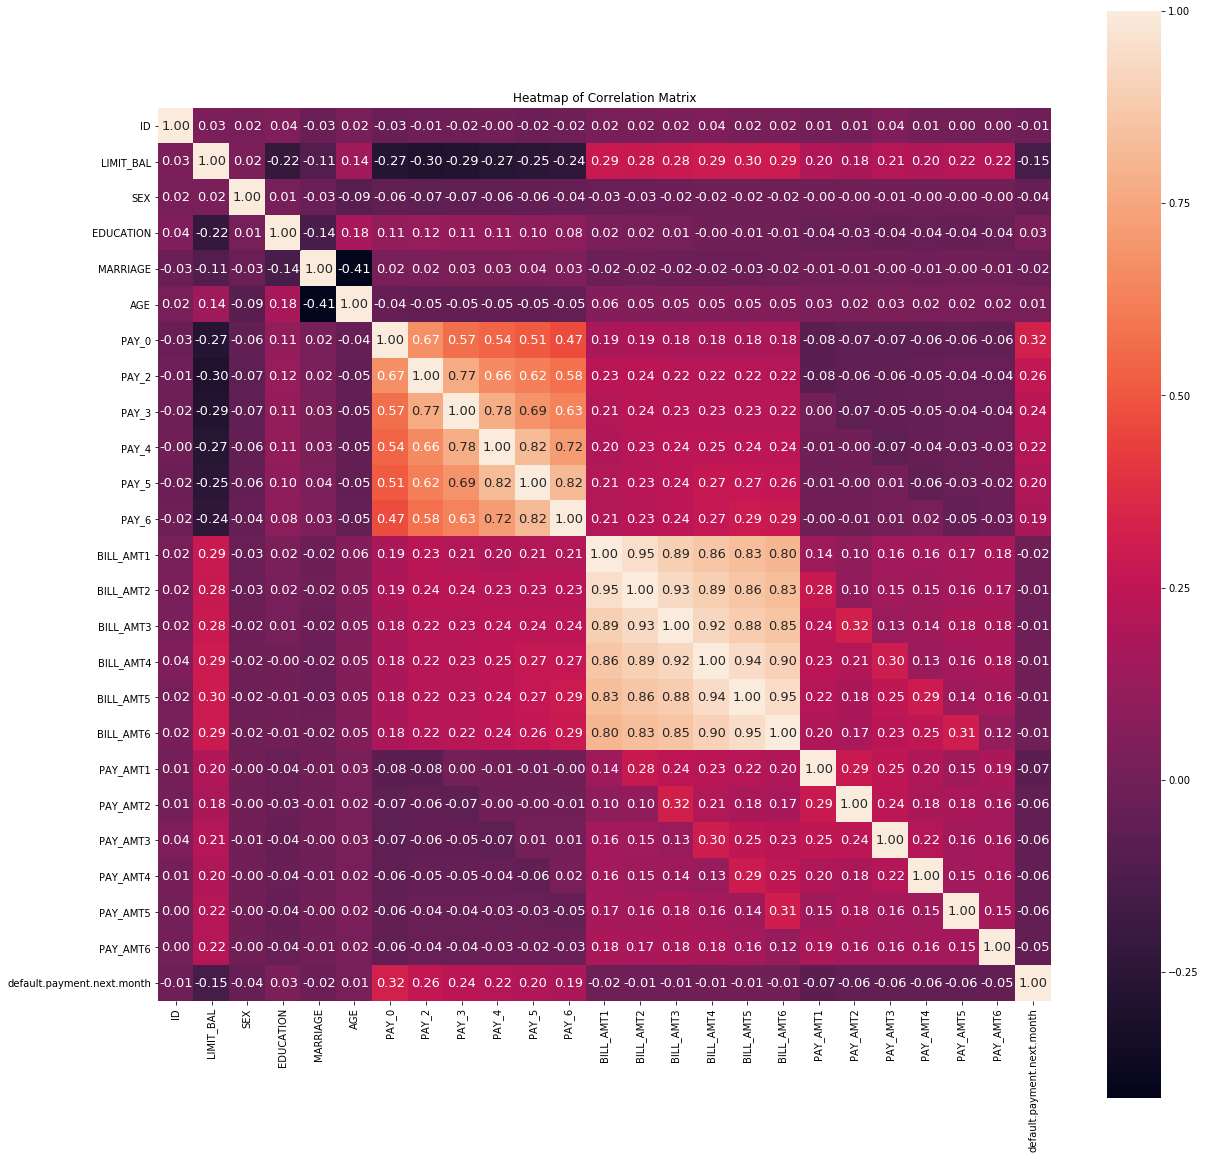

In [4]:
#corr = correlation
corr = df.corr()
corr = (corr)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

#### This Heatmap is showing the correlation between my feature variables. Variables like Pay_0, Pay_1, ... , Pay_6 all signify the customers repayment status as of those times in the year each one based on a particular month. This would obviously have a correlation with the Bill_AMT or bill amounts. Anecdotably, if your bill is of a smaller value you are more likely to pay it back than say if it was larger than normal for you. If it is too large debt can carry over and repayment plans can be put into place. In general, however, you can start to see how my models will be basing their predictabilites.

In [5]:
OHE = OneHotEncoder(sparse=False)
sex = OHE.fit_transform(X[['SEX']])
marriage = OHE.fit_transform(X[['MARRIAGE']])
education = OHE.fit_transform(X[['EDUCATION']])

# Called cat because all these values are going to be concatenated together using hstack
cat_variables = np.hstack((sex, marriage, education))
cat_var_names = ['SEX','MARRIAGE', 'EDUCATION']
num_variables = X.drop(cat_var_names, axis=1)

# Standardized frame
scaler = StandardScaler().fit(num_variables)
stdz_num_variables = scaler.transform(num_variables)

# Final_X ='s' training data that will be trained
final_X = np.hstack((cat_variables,stdz_num_variables))

C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you 

# FEATURE ENGINEERING
### Selected 12 best parameters using SelectKBest from sklearn. I have selected 12 because based off my correlation matrix I can see that there are 12 features that are significantly higher than the rest.

In [60]:
# from sklearn.feature_selection import SelectKBest
# I am selecting the best 12 variables which should be the ones the
# Correlation matrix hinted at
test = SelectKBest(k=12)
#fit = test.fit(final_X,Y)
features = test.fit_transform(final_X, Y)
np.set_printoptions(precision=None)
#print(fit.scores_)
#Grabs Features to plug into train_test_split
#features = fit.transform(final_X)
frame = pd.DataFrame(features)

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(frame,Y, test_size=0.2, random_state=42)

# PREDICTION MODELS
### Models used are: SVM, Decision Tree, Logistic Regression, Neural Network

## SVM

In [52]:
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X_train,y_train)
Y_pred = clf.predict(X_test)

In [53]:
confusion = metrics.confusion_matrix(y_test, Y_pred, labels=[0, 1])
print(confusion)

[[4465  222]
 [ 851  462]]


In [54]:
print(metrics.classification_report(y_test, Y_pred, digits=7))

              precision    recall  f1-score   support

           0  0.8399172 0.9526349 0.8927322      4687
           1  0.6754386 0.3518660 0.4626940      1313

   micro avg  0.8211667 0.8211667 0.8211667      6000
   macro avg  0.7576779 0.6522505 0.6777131      6000
weighted avg  0.8039238 0.8211667 0.7986255      6000



#### Precision, Recall, F1-Scores. and ROC/AUC for SVM

In [55]:
print("precision:", metrics.recall_score(y_test, Y_pred, average='weighted'))
print("recall:", metrics.precision_score(y_test, Y_pred, average='weighted'))
print("f1-score:", metrics.f1_score(y_test, Y_pred, average='weighted'))
print("roc auc score:", metrics.roc_auc_score(y_test, Y_pred, average='weighted'))


precision: 0.8211666666666667
recall: 0.8039238231489182
f1-score: 0.7986255008658477
roc auc score: 0.6522504517770548


## Decision Tree
### Grid Searched for best model parameters

In [22]:
dt = tree.DecisionTreeClassifier()
param_grid = {'max_depth': np.arange(3, 10), 'criterion' : ['gini','entropy'],'max_leaf_nodes': [5,10,20,100],'min_samples_split': [2, 5, 10, 20]}
grid_tree = GridSearchCV(dt, param_grid, cv = 5, scoring= 'accuracy')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8205833333333333


In [23]:
# Taken from grid search
# Note: May not be same as submission as I may have reran it and got different result
dt = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dt = dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

In [24]:
dt.score(X_test, y_test)

0.8208333333333333

In [25]:
confusion = metrics.confusion_matrix(y_test, Y_pred, labels=[0, 1])
print(confusion)

[[4456  231]
 [ 844  469]]


In [26]:
print(metrics.classification_report(y_test, Y_pred, digits=7))

              precision    recall  f1-score   support

           0  0.8407547 0.9507147 0.8923601      4687
           1  0.6700000 0.3571973 0.4659712      1313

   micro avg  0.8208333 0.8208333 0.8208333      6000
   macro avg  0.7553774 0.6539560 0.6791656      6000
weighted avg  0.8033879 0.8208333 0.7990520      6000



#### Precision, Recall, and F1-Scores for Decision Tree

In [27]:
print("precision:", metrics.recall_score(y_test, Y_pred, average='weighted'))
print("recall:", metrics.precision_score(y_test, Y_pred, average='weighted'))
print("f1-score:", metrics.f1_score(y_test, Y_pred, average='weighted'))

precision: 0.8208333333333333
recall: 0.803387893081761
f1-score: 0.799051968005501


# Neural Network

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100), activation='logistic', solver='adam', learning_rate='adaptive', max_iter=1000, verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.52678357
Iteration 2, loss = 0.46557389
Iteration 3, loss = 0.45588828
Iteration 4, loss = 0.45307990
Iteration 5, loss = 0.45187807
Iteration 6, loss = 0.45102799
Iteration 7, loss = 0.45055384
Iteration 8, loss = 0.45127397
Iteration 9, loss = 0.45055217
Iteration 10, loss = 0.45030699
Iteration 11, loss = 0.45014275
Iteration 12, loss = 0.45006824
Iteration 13, loss = 0.45027278
Iteration 14, loss = 0.45008756
Iteration 15, loss = 0.45015624
Iteration 16, loss = 0.44998701
Iteration 17, loss = 0.45060936
Iteration 18, loss = 0.44967688
Iteration 19, loss = 0.44954972
Iteration 20, loss = 0.44939282
Iteration 21, loss = 0.44957060
Iteration 22, loss = 0.44920837
Iteration 23, loss = 0.44854067
Iteration 24, loss = 0.44831644
Iteration 25, loss = 0.44783675
Iteration 26, loss = 0.44761087
Iteration 27, loss = 0.44690647
Iteration 28, loss = 0.44636857
Iteration 29, loss = 0.44619088
Iteration 30, loss = 0.44617758
Iteration 31, loss = 0.44546474
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [35]:
Y_pred = mlp.predict(X_test)
mlp.score(X_test, y_test)

0.8216666666666667

In [36]:
confusion = metrics.confusion_matrix(y_test, Y_pred, labels=[0, 1])
print(confusion)

[[4485  202]
 [ 868  445]]


In [37]:
print(metrics.classification_report(y_test, Y_pred, digits=7))

              precision    recall  f1-score   support

           0  0.8378479 0.9569021 0.8934263      4687
           1  0.6877898 0.3389185 0.4540816      1313

   micro avg  0.8216667 0.8216667 0.8216667      6000
   macro avg  0.7628189 0.6479103 0.6737540      6000
weighted avg  0.8050102 0.8216667 0.7972830      6000



#### Precision, Recall, and F1-Scores for Neural Network

In [38]:
print("precision:", metrics.recall_score(y_test, Y_pred, average='weighted'))
print("recall:", metrics.precision_score(y_test, Y_pred, average='weighted'))
print("f1-score:", metrics.f1_score(y_test, Y_pred, average='weighted'))

precision: 0.8216666666666667
recall: 0.8050102134969264
f1-score: 0.7972830379163617
